In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objs as go
import requests
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
plt.style.use('bmh')

In [3]:
''' 
https://poloniex.com/support/api/ 
https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1414602755&end=9999999999&period=86400 
''' 

' \nhttps://poloniex.com/support/api/ \nhttps://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1414602755&end=9999999999&period=86400 \n'

In [4]:
ret = requests.get('https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1414602755&end=9999999999&period=86400')
ret

<Response [200]>

In [5]:
js = ret.json()
js

[{'date': '1642291200000',
  'high': '43461.00',
  'low': '42635.00',
  'open': '43085.51',
  'close': '43078.82',
  'volume': '127.945349',
  'quoteVolume': '5509851.1',
  'weightedAverage': '43064.09'},
 {'date': '1642377600000',
  'high': '43174.54',
  'low': '41555.00',
  'open': '43070.84',
  'close': '42236.06',
  'volume': '236.653442',
  'quoteVolume': '10060633.4',
  'weightedAverage': '42512.09'},
 {'date': '1642464000000',
  'high': '42672.73',
  'low': '41290.32',
  'open': '42202.66',
  'close': '42366.85',
  'volume': '325.838504',
  'quoteVolume': '13663068.37',
  'weightedAverage': '41932.02'},
 {'date': '1642550400000',
  'high': '42559.35',
  'low': '41135.05',
  'open': '42362.84',
  'close': '41664.90',
  'volume': '379.791858',
  'quoteVolume': '15899930.32',
  'weightedAverage': '41864.85'},
 {'date': '1642636800000',
  'high': '43498.00',
  'low': '40574.92',
  'open': '41662.79',
  'close': '40700.00',
  'volume': '495.167608',
  'quoteVolume': '20800090.71',
  

In [6]:
df = pd.DataFrame(js)
df

,date,high,low,open,close,volume,quoteVolume,weightedAverage
0,1642291200000,43461.00,42635.00,43085.51,43078.82,127.945349,5509851.1,43064.09
1,1642377600000,43174.54,41555.00,43070.84,42236.06,236.653442,10060633.4,42512.09
2,1642464000000,42672.73,41290.32,42202.66,42366.85,325.838504,13663068.37,41932.02
3,1642550400000,42559.35,41135.05,42362.84,41664.90,379.791858,15899930.32,41864.85
4,1642636800000,43498.00,40574.92,41662.79,40700.00,495.167608,20800090.71,42006.16
...,...,...,...,...,...,...,...,...
495,1685059200000,26910.83,26333.30,26498.76,26705.93,85.251102,2260737.44,26519.03
496,1685145600000,26878.13,26567.29,26706.14,26856.16,39.013309,1042352.26,26717.94
497,1685232000000,28235.16,26769.82,26856.16,28064.96,126.630639,3475176.54,27446.51
498,1685318400000,28415.13,27500.00,28064.97,27736.66,59.940426,1670174.6,27865.18


In [7]:
scaler = MinMaxScaler()
df[['close']] = scaler.fit_transform(df[['close']])
df

,date,high,low,open,close,volume,quoteVolume,weightedAverage
0,1642291200000,43461.00,42635.00,43085.51,0.862711,127.945349,5509851.1,43064.09
1,1642377600000,43174.54,41555.00,43070.84,0.836078,236.653442,10060633.4,42512.09
2,1642464000000,42672.73,41290.32,42202.66,0.840211,325.838504,13663068.37,41932.02
3,1642550400000,42559.35,41135.05,42362.84,0.818029,379.791858,15899930.32,41864.85
4,1642636800000,43498.00,40574.92,41662.79,0.787536,495.167608,20800090.71,42006.16
...,...,...,...,...,...,...,...,...
495,1685059200000,26910.83,26333.30,26498.76,0.345299,85.251102,2260737.44,26519.03
496,1685145600000,26878.13,26567.29,26706.14,0.350046,39.013309,1042352.26,26717.94
497,1685232000000,28235.16,26769.82,26856.16,0.388247,126.630639,3475176.54,27446.51
498,1685318400000,28415.13,27500.00,28064.97,0.377872,59.940426,1670174.6,27865.18


In [8]:
price = df['close'].values.tolist()
price

[0.8627109061772272,
 0.8360782092927496,
 0.8402114031148588,
 0.8180285496594754,
 0.787536014152531,
 0.6535616286407991,
 0.6092117226086239,
 0.6473076408940642,
 0.6606894049736741,
 0.6683006881914663,
 0.6637348663135066,
 0.6758124258741284,
 0.6936569901032777,
 0.7058394674977507,
 0.6994672891791475,
 0.7169831951335824,
 0.7243596772954964,
 0.6669762585478803,
 0.6805473171530231,
 0.8145539364570827,
 0.8093759885424671,
 0.8404127063081216,
 0.8866852632473777,
 0.8926396663360069,
 0.9037909783935626,
 0.8756306525668055,
 0.8404335634678631,
 0.8346444375693068,
 0.8302887673766214,
 0.8450717533697746,
 0.9090128527506643,
 0.8879129915139802,
 0.7810127794345879,
 0.765063688601341,
 0.767708439660079,
 0.7133382484599674,
 0.6707871144467118,
 0.7098513105722731,
 0.6786685926884278,
 0.7132718847698808,
 0.7404377032980541,
 0.7372674150173447,
 0.692125252932564,
 0.8659703114131959,
 0.9045241391602338,
 0.8884622300538402,
 0.8431731197981532,
 0.73822589631273

In [9]:
'''
Many to Many
Many to One

X
(5, 1)
 0.057952922321361705,
 0.04047361277955355,
 0.0005532168396120696,
 0.02997810961897443,
 0.029365631586923735,
Y
(sample, 1)
'''

window_size = 5
X = []
Y = []

for i in range(len(price) - window_size):
    # i = 0
    # j = 0,1,2,3,4
    X.append([price[i + j] for j in range(window_size)])
    Y.append(price[window_size+i])

print(X)
print(Y)    

[[0.8627109061772272, 0.8360782092927496, 0.8402114031148588, 0.8180285496594754, 0.787536014152531], [0.8360782092927496, 0.8402114031148588, 0.8180285496594754, 0.787536014152531, 0.6535616286407991], [0.8402114031148588, 0.8180285496594754, 0.787536014152531, 0.6535616286407991, 0.6092117226086239], [0.8180285496594754, 0.787536014152531, 0.6535616286407991, 0.6092117226086239, 0.6473076408940642], [0.787536014152531, 0.6535616286407991, 0.6092117226086239, 0.6473076408940642, 0.6606894049736741], [0.6535616286407991, 0.6092117226086239, 0.6473076408940642, 0.6606894049736741, 0.6683006881914663], [0.6092117226086239, 0.6473076408940642, 0.6606894049736741, 0.6683006881914663, 0.6637348663135066], [0.6473076408940642, 0.6606894049736741, 0.6683006881914663, 0.6637348663135066, 0.6758124258741284], [0.6606894049736741, 0.6683006881914663, 0.6637348663135066, 0.6758124258741284, 0.6936569901032777], [0.6683006881914663, 0.6637348663135066, 0.6758124258741284, 0.6936569901032777, 0.705

In [10]:
X = np.asarray(X)
Y = np.asarray(Y)
print(X)
print(Y)

[[0.86271091 0.83607821 0.8402114  0.81802855 0.78753601]
 [0.83607821 0.8402114  0.81802855 0.78753601 0.65356163]
 [0.8402114  0.81802855 0.78753601 0.65356163 0.60921172]
 ...
 [0.36105703 0.33344973 0.33875188 0.34529881 0.35004634]
 [0.33344973 0.33875188 0.34529881 0.35004634 0.38824655]
 [0.33875188 0.34529881 0.35004634 0.38824655 0.37787169]]
[0.65356163 0.60921172 0.64730764 0.6606894  0.66830069 0.66373487
 0.67581243 0.69365699 0.70583947 0.69946729 0.7169832  0.72435968
 0.66697626 0.68054732 0.81455394 0.80937599 0.84041271 0.88668526
 0.89263967 0.90379098 0.87563065 0.84043356 0.83464444 0.83028877
 0.84507175 0.90901285 0.88791299 0.78101278 0.76506369 0.76770844
 0.71333825 0.67078711 0.70985131 0.67866859 0.71327188 0.7404377
 0.73726742 0.69212525 0.86597031 0.90452414 0.88846223 0.84317312
 0.7382259  0.74587257 0.71475148 0.70233294 0.72554285 0.82669186
 0.74717299 0.72522114 0.72763804 0.6949514  0.75457823 0.74267195
 0.80056289 0.79442583 0.82086986 0.83511467

In [11]:
X.shape
Y.shape

(495,)

In [12]:
train_test_split = 400
X_train = X[:train_test_split, :]
Y_train = Y[:train_test_split]

X_test = X[train_test_split:, :]
Y_test = Y[train_test_split:]

In [13]:
Y_train.shape
X_test

array([[0.2860136 , 0.2740261 , 0.2656646 , 0.25782578, 0.23398447],
       [0.2740261 , 0.2656646 , 0.25782578, 0.23398447, 0.23312743],
       [0.2656646 , 0.25782578, 0.23398447, 0.23312743, 0.24590181],
       [0.25782578, 0.23398447, 0.23312743, 0.24590181, 0.24373519],
       [0.23398447, 0.23312743, 0.24590181, 0.24373519, 0.2324837 ],
       [0.23312743, 0.24590181, 0.24373519, 0.2324837 , 0.24814901],
       [0.24590181, 0.24373519, 0.2324837 , 0.24814901, 0.24292808],
       [0.24373519, 0.2324837 , 0.24814901, 0.24292808, 0.20770697],
       [0.2324837 , 0.24814901, 0.24292808, 0.20770697, 0.20791713],
       [0.24814901, 0.24292808, 0.20770697, 0.20791713, 0.20996271],
       [0.24292808, 0.20770697, 0.20791713, 0.20996271, 0.20939198],
       [0.20770697, 0.20791713, 0.20996271, 0.20939198, 0.20289213],
       [0.20791713, 0.20996271, 0.20939198, 0.20289213, 0.18717089],
       [0.20996271, 0.20939198, 0.20289213, 0.18717089, 0.14465294],
       [0.20939198, 0.20289213, 0.

In [14]:
X_train[0]

array([0.86271091, 0.83607821, 0.8402114 , 0.81802855, 0.78753601])

In [15]:
X_train = np.reshape(X_train, (X_train.shape[0], window_size, 1))
X_test = np.reshape(X_test, (X_test.shape[0], window_size, 1))

# Y_train = np.reshape(Y_train, (Y_train.shape[0], window_size, 1))
# Y_test = np.reshape(Y_test, (Y_test.shape[0], window_size, 1))

In [16]:
Y_train.shape

(400,)

In [17]:
X_train[0]

array([[0.86271091],
       [0.83607821],
       [0.8402114 ],
       [0.81802855],
       [0.78753601]])

In [18]:
# model = Sequential()
# model.add(LSTM(128, input_shape=(5,1,)))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='linear'))

i = Input(shape=(5,1))
x = LSTM(128)(i) # or RNN
x = Dense(1)(x)
model =Model(i, x)
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 66689 (260.50 KB)
Trainable params: 66689 (260.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.fit(X_train, Y_train, epochs=10, batch_size=1)

Epoch 1/10
400/400 [==============================] - 1s 950us/step - loss: 0.0062
Epoch 2/10
400/400 [==============================] - 0s 919us/step - loss: 0.0031
Epoch 3/10
400/400 [==============================] - 0s 892us/step - loss: 0.0030
Epoch 4/10
400/400 [==============================] - 0s 891us/step - loss: 0.0025
Epoch 5/10
400/400 [==============================] - 0s 883us/step - loss: 0.0025
Epoch 6/10
400/400 [==============================] - 0s 874us/step - loss: 0.0019
Epoch 7/10
400/400 [==============================] - 0s 877us/step - loss: 0.0019
Epoch 8/10
400/400 [==============================] - 0s 883us/step - loss: 0.0021
Epoch 9/10
400/400 [==============================] - 0s 879us/step - loss: 0.0016
Epoch 10/10
400/400 [==============================] - 0s 884us/step - loss: 0.0016


In [20]:
# Method2
model = Sequential()
model.add(LSTM(128, input_shape=(5,1,))) # or RNN
# model.add(SimpleRNN(128, input_shape=(5,1,), activation='relu')) # or RNN
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 66689 (260.50 KB)
Trainable params: 66689 (260.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model.fit(X_train, Y_train, epochs=10, batch_size=1)

Epoch 1/10
400/400 [==============================] - 1s 927us/step - loss: 0.0074
Epoch 2/10
400/400 [==============================] - 0s 898us/step - loss: 0.0050
Epoch 3/10
400/400 [==============================] - 0s 904us/step - loss: 0.0039
Epoch 4/10
400/400 [==============================] - 0s 888us/step - loss: 0.0044
Epoch 5/10
400/400 [==============================] - 0s 900us/step - loss: 0.0029
Epoch 6/10
400/400 [==============================] - 0s 897us/step - loss: 0.0033
Epoch 7/10
400/400 [==============================] - 0s 898us/step - loss: 0.0032
Epoch 8/10
400/400 [==============================] - 0s 895us/step - loss: 0.0030
Epoch 9/10
400/400 [==============================] - 0s 899us/step - loss: 0.0033
Epoch 10/10
400/400 [==============================] - 0s 906us/step - loss: 0.0031


In [22]:
X_test

array([[[0.2860136 ],
        [0.2740261 ],
        [0.2656646 ],
        [0.25782578],
        [0.23398447]],

       [[0.2740261 ],
        [0.2656646 ],
        [0.25782578],
        [0.23398447],
        [0.23312743]],

       [[0.2656646 ],
        [0.25782578],
        [0.23398447],
        [0.23312743],
        [0.24590181]],

       [[0.25782578],
        [0.23398447],
        [0.23312743],
        [0.24590181],
        [0.24373519]],

       [[0.23398447],
        [0.23312743],
        [0.24590181],
        [0.24373519],
        [0.2324837 ]],

       [[0.23312743],
        [0.24590181],
        [0.24373519],
        [0.2324837 ],
        [0.24814901]],

       [[0.24590181],
        [0.24373519],
        [0.2324837 ],
        [0.24814901],
        [0.24292808]],

       [[0.24373519],
        [0.2324837 ],
        [0.24814901],
        [0.24292808],
        [0.20770697]],

       [[0.2324837 ],
        [0.24814901],
        [0.24292808],
        [0.20770697],
        [0.20791

In [29]:
# import tensorflow
# tensorflow.config.run_functions_eagerly(True)
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


3/3 [==============================] - 0s 4ms/step


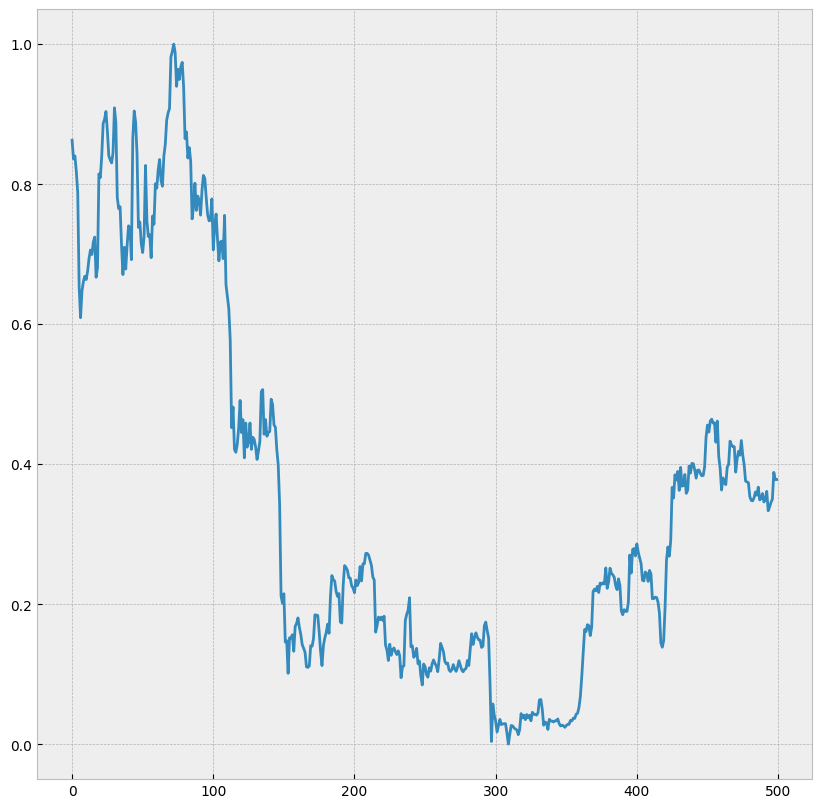

In [30]:
plt.figure(figsize= (10, 10))
plt.plot(price)

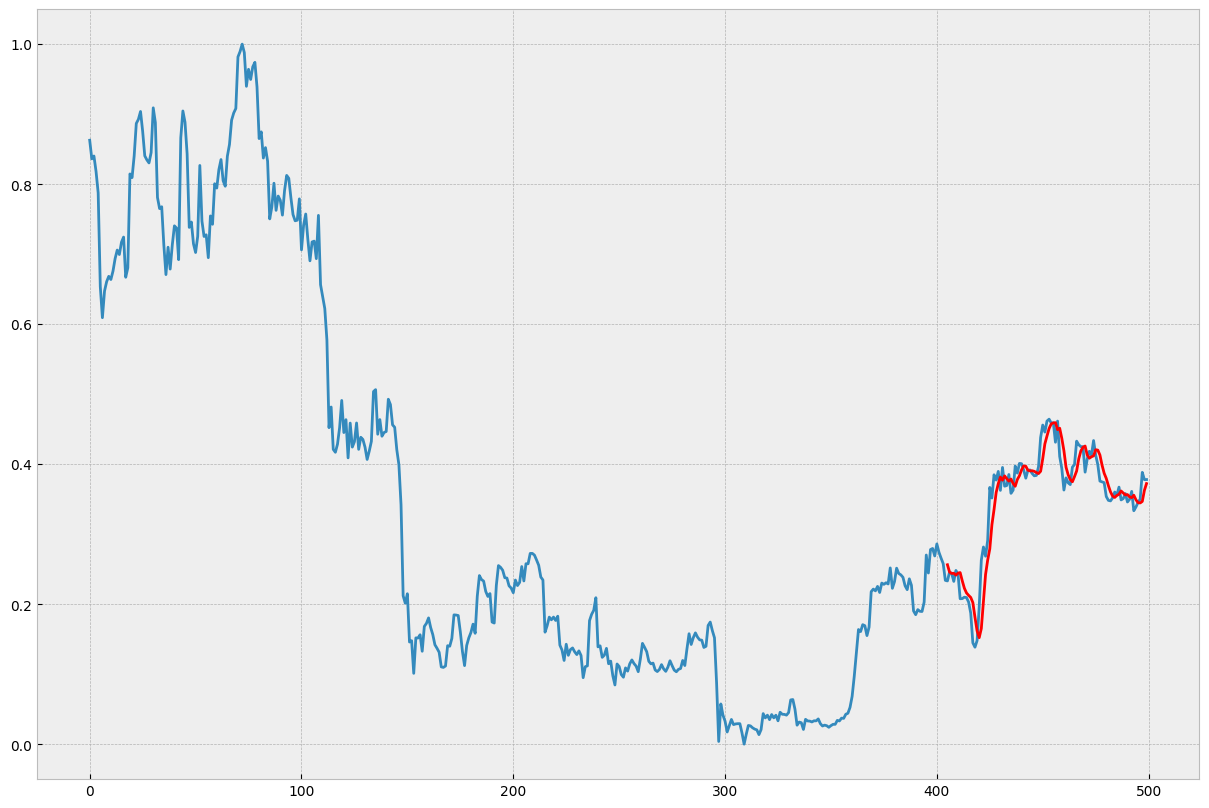

In [31]:
plt.figure(figsize= (15, 10))
plt.plot(price)

split_pt = train_test_split + window_size
# 1
# plt.plot(np.arange(window_size, split_pt, 1), train_predict, color='g')

# 2
plt.plot(np.arange(split_pt, split_pt + len(test_predict), 1), test_predict, color='r')

In [34]:
train_predict.shape

(400, 1)

In [35]:
# np.arange(window_size, split_pt, 1), train_predict
# plt.plot(np.arange(split_pt, split_pt + len(test_predict), 1), test_predict
trace = go.Scatter(x=np.arange(window_size, split_pt, 1), 
                   y = train_predict.reshape(400), mode='lines', name='train')


In [40]:
test_predict.shape

(95, 1)

In [41]:
trace2 = go.Scatter(x=np.arange(split_pt, split_pt + len(test_predict), 1), 
                    y = test_predict.reshape(95), mode='lines', name='test')


In [42]:
trace3 = go.Scatter(x=np.arange(1, len(price), 1), 
                    y = price, mode='lines', name='original')

data = [trace, trace2, trace3]
py.offline.plot(data)

'temp-plot.html'

## predict

In [43]:
train_predict[389]

array([0.19205879], dtype=float32)

In [45]:
print("X_test[94]:", X_test[94])
print("test_predict[94]:", test_predict[94])

X_test[94]: [[0.33875188]
 [0.34529881]
 [0.35004634]
 [0.38824655]
 [0.37787169]]
test_predict[94]: [0.3722084]


In [46]:
test_predict

array([[0.25628066],
       [0.2457633 ],
       [0.2438632 ],
       [0.24413082],
       [0.24144608],
       [0.24425802],
       [0.24509686],
       [0.2333143 ],
       [0.22270444],
       [0.21598503],
       [0.21255192],
       [0.2095525 ],
       [0.20219937],
       [0.18127182],
       [0.16175573],
       [0.15206976],
       [0.1652358 ],
       [0.20382945],
       [0.24241859],
       [0.26293084],
       [0.2789867 ],
       [0.31345397],
       [0.33508223],
       [0.35941413],
       [0.37211004],
       [0.38148403],
       [0.37715688],
       [0.38320184],
       [0.37923905],
       [0.3757247 ],
       [0.378693  ],
       [0.37239644],
       [0.36838987],
       [0.3780245 ],
       [0.3834379 ],
       [0.39185962],
       [0.3974717 ],
       [0.39694995],
       [0.3912339 ],
       [0.39033368],
       [0.39056158],
       [0.38971117],
       [0.3879353 ],
       [0.38650432],
       [0.3898389 ],
       [0.40781155],
       [0.42890307],
       [0.440

In [47]:
scaler.inverse_transform(test_predict) 

array([[23889.057],
       [23556.246],
       [23496.121],
       [23504.59 ],
       [23419.633],
       [23508.615],
       [23535.158],
       [23162.314],
       [22826.578],
       [22613.95 ],
       [22505.312],
       [22410.4  ],
       [22177.719],
       [21515.492],
       [20897.928],
       [20591.426],
       [21008.05 ],
       [22229.3  ],
       [23450.408],
       [24099.494],
       [24607.562],
       [25698.238],
       [26382.639],
       [27152.594],
       [27554.34 ],
       [27850.969],
       [27714.041],
       [27905.326],
       [27779.93 ],
       [27668.723],
       [27762.65 ],
       [27563.402],
       [27436.62 ],
       [27741.496],
       [27912.797],
       [28179.293],
       [28356.879],
       [28340.37 ],
       [28159.492],
       [28131.006],
       [28138.217],
       [28111.307],
       [28055.111],
       [28009.83 ],
       [28115.35 ],
       [28684.072],
       [29351.488],
       [29708.184],
       [30045.275],
       [30254.77 ],
